In [1]:
# need_matrix = info_data.drop('Województwo', axis =1, inplace = True)
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

In [31]:
url = 'http://api.dane.gov.pl/1.4/resources/39558,uczniowie-uchodzcy-z-ukrainy-bezpatny-jezyk-polski-w-podziale-na-typy-szko-i-powiaty-_stan-na-27062022?lang=pl'
response = requests.get(url)
data = response.json()['data']['attributes']['csv_download_url']
info_data = pd.read_csv(data, dtype = {'Województwo':'str'})
info_data

info_data = info_data[['idTerytWojewodztwo','Województwo','Publiczność','idTypPodmiotu','Typ podmiotu','Liczba uczniów uchodźców z Ukrainy']]
info_data


,idTerytWojewodztwo,Województwo,Publiczność,idTypPodmiotu,Typ podmiotu,Liczba uczniów uchodźców z Ukrainy
0,2,DOLNOŚLĄSKIE,publiczna,1,Przedszkole,87
1,2,DOLNOŚLĄSKIE,publiczna,3,Szkoła podstawowa,407
2,2,DOLNOŚLĄSKIE,publiczna,14,Liceum ogólnokształcące,36
3,2,DOLNOŚLĄSKIE,publiczna,16,Technikum,13
4,2,DOLNOŚLĄSKIE,publiczna,81,Punkt przedszkolny,1
...,...,...,...,...,...,...
2279,32,ZACHODNIOPOMORSKIE,publiczna,3,Szkoła podstawowa,262
2280,32,ZACHODNIOPOMORSKIE,publiczna,14,Liceum ogólnokształcące,18
2281,32,ZACHODNIOPOMORSKIE,publiczna,16,Technikum,16
2282,32,ZACHODNIOPOMORSKIE,publiczna,93,Branżowa szkoła I stopnia,3


In [34]:
info_data.groupby(['Województwo','Typ podmiotu'], as_index=False)[['Liczba uczniów uchodźców z Ukrainy']].sum()

,Województwo,Typ podmiotu,Liczba uczniów uchodźców z Ukrainy
0,DOLNOŚLĄSKIE,Branżowa szkoła I stopnia,37
1,DOLNOŚLĄSKIE,Liceum ogólnokształcące,1446
2,DOLNOŚLĄSKIE,Liceum sztuk plastycznych,5
3,DOLNOŚLĄSKIE,Przedszkole,3926
4,DOLNOŚLĄSKIE,Punkt przedszkolny,69
...,...,...,...
153,ŚWIĘTOKRZYSKIE,Punkt przedszkolny,26
154,ŚWIĘTOKRZYSKIE,Szkoła podstawowa,2046
155,ŚWIĘTOKRZYSKIE,Szkoła policealna,4
156,ŚWIĘTOKRZYSKIE,Szkoła specjalna przysposabiająca do pracy,1


In [22]:
uniqe_id_region = info_data.idTerytWojewodztwo.unique()
base_school = info_data[info_data['Typ podmiotu'] == 'Szkoła podstawowa'] 
uniqe_region1 = base_school.Województwo.unique()
student_list1 = []
for i in uniqe_region1:
    region = base_school[base_school['Województwo']==i]
    mid_student = np.sum(region['Liczba uczniów uchodźców z Ukrainy'])
    student_list1.append(mid_student)


In [23]:
mid_school = info_data[info_data['Typ podmiotu'] == 'Liceum ogólnokształcące'] 
uniqe_region2 = mid_school.Województwo.unique()
student_list2 = []
for x in uniqe_region2:
    region = mid_school[mid_school['Województwo']==x]
    mid_student = np.sum(region['Liczba uczniów uchodźców z Ukrainy'])
    student_list2.append(mid_student)

In [24]:
tech_school = info_data[info_data['Typ podmiotu'] == 'Technikum'] 
uniqe_region3 = tech_school.Województwo.unique()
student_list3 = []
for y in uniqe_region3:
    region = tech_school[tech_school['Województwo']==y]
    mid_student = np.sum(region['Liczba uczniów uchodźców z Ukrainy'])
    student_list3.append(mid_student)

In [25]:
region_list =[]
for j in uniqe_region1:
    region_list.append(j)    


In [35]:


main_matrix = {"ID regionu": uniqe_id_region,
                "Region":region_list,
               
               "ilość uczniów P":student_list1
              }

main_matrix2 = {
               
               "ilość uczniów LO":student_list2
              }
main_matrix3 = {
              
               "ilość uczniów Tech":student_list3
              }

base = pd.DataFrame(main_matrix)
mid = pd.DataFrame(main_matrix2)
tech = pd.DataFrame(main_matrix3)

ukrainian_children_in_school = pd.concat([base,mid,tech], axis=1)
ukrainian_children_in_school

,ID regionu,Region,ilość uczniów P,ilość uczniów LO,ilość uczniów Tech
0,2,DOLNOŚLĄSKIE,12993,1446,333
1,4,KUJAWSKO-POMORSKIE,5170,526,87
2,6,LUBELSKIE,4663,342,57
3,8,LUBUSKIE,4388,495,75
4,10,ŁÓDZKIE,7769,854,243
5,12,MAŁOPOLSKIE,11232,948,352
6,14,MAZOWIECKIE,22860,2005,215
7,16,OPOLSKIE,2840,270,87
8,18,PODKARPACKIE,2831,327,73
9,20,PODLASKIE,2278,187,42


In [27]:
area_id = ukrainian_children_in_school[['ID regionu']]
school_P = ukrainian_children_in_school[['ilość uczniów P']] 
school_LO= ukrainian_children_in_school[['ilość uczniów LO']]
school_Tech= ukrainian_children_in_school[['ilość uczniów Tech']]

area = ukrainian_children_in_school[['Region']]
area_id = ukrainian_children_in_school[['ID regionu']]
all_children_in_region = pd.concat([area,school_LO,school_P,school_Tech], axis=1)
all_children = pd.concat([area_id,school_LO,school_P,school_Tech], axis=1)
all_children_in_region


,Region,ilość uczniów LO,ilość uczniów P,ilość uczniów Tech
0,DOLNOŚLĄSKIE,1446,12993,333
1,KUJAWSKO-POMORSKIE,526,5170,87
2,LUBELSKIE,342,4663,57
3,LUBUSKIE,495,4388,75
4,ŁÓDZKIE,854,7769,243
5,MAŁOPOLSKIE,948,11232,352
6,MAZOWIECKIE,2005,22860,215
7,OPOLSKIE,270,2840,87
8,PODKARPACKIE,327,2831,73
9,PODLASKIE,187,2278,42


In [28]:
all_children.describe()

,ID regionu,ilość uczniów LO,ilość uczniów P,ilość uczniów Tech
count,16.000000,16.00000,16.000000,16.000000
mean,17.000000,712.50000,7856.062500,187.312500
std,9.521905,516.85704,5756.189382,134.324839
min,2.000000,165.00000,2046.000000,39.000000
25%,9.500000,312.75000,2951.000000,74.500000
50%,17.000000,582.00000,5963.500000,154.000000
75%,24.500000,934.50000,11646.500000,284.250000
max,32.000000,2005.00000,22860.000000,434.000000


<AxesSubplot:xlabel='Region'>

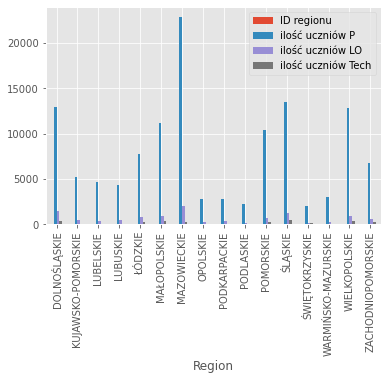

In [40]:

plt.style.use('ggplot')
ax = ukrainian_children_in_school.plot(x='Region', kind='bar') 
ax

In [30]:
tabela = info_data[['Województwo','Liczba uczniów uchodźców z Ukrainy','Typ podmiotu']]
pojedyncze = tabela['Województwo'].unique()
wsztskie = tabela['Województwo']


konkretne_woj = tabela[tabela['Województwo'] == 'MAŁOPOLSKIE']

typ_szkoły = konkretne_woj[(konkretne_woj['Typ podmiotu']=='Szkoła podstawowa')|
                           (konkretne_woj['Typ podmiotu']=='Liceum ogólnokształcące')|
                           (konkretne_woj['Typ podmiotu']=='Technikum')]
suma_uczniów = np.sum(typ_szkoły['Liczba uczniów uchodźców z Ukrainy'])






typ_szkoły

,Województwo,Liczba uczniów uchodźców z Ukrainy,Typ podmiotu
679,MAŁOPOLSKIE,286,Szkoła podstawowa
680,MAŁOPOLSKIE,4,Liceum ogólnokształcące
681,MAŁOPOLSKIE,4,Technikum
685,MAŁOPOLSKIE,164,Szkoła podstawowa
686,MAŁOPOLSKIE,46,Liceum ogólnokształcące
...,...,...,...
814,MAŁOPOLSKIE,2,Liceum ogólnokształcące
815,MAŁOPOLSKIE,1,Technikum
817,MAŁOPOLSKIE,225,Szkoła podstawowa
818,MAŁOPOLSKIE,57,Liceum ogólnokształcące
